<a href="https://colab.research.google.com/github/qnrua0511/kaggle_study/blob/main/San_Francisco_Crime_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [샌프란시스코 범죄 분류](https://www.kaggle.com/c/sf-crime/data?select=sampleSubmission.csv.zip)

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!ls

sample_data  sf-crime.zip


In [6]:
!unzip '*zip'

Archive:  sf-crime.zip
  inflating: sampleSubmission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [7]:
!unzip '*zip'

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    

Archive:  train.csv.zip
  inflating: train.csv               

3 archives were successfully processed.


In [8]:
import os
DATA_PATH="./"
for file in os.listdir(DATA_PATH):
  if 'csv' in file and 'zip' not in file:
    print(file.ljust(30)+str(round(os.path.getsize(file)/1000000,2))+'MB')

sampleSubmission.csv          75.05MB
train.csv                     127.43MB
test.csv                      91.0MB


In [9]:
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [10]:
train.shape, test.shape

((878049, 9), (884262, 7))

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [13]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


test에는 Category, Descript, Resolution이 없고 train에는 Id가 없음
- Category는 종속변수 이지만 Descript,Resolution 데이터는 학습에 불필요하니 삭제
- Descript는 범죄 사건의 개요를 간단하게 분류한 글
- Resolution은 범죄 사건이 어떻게 마무리 되는지 정리한 글

변수 설명
- Dates: 범죄 발생 시각
- Category: 범죄 사건의 유형(종속변수)
- DayOfWeek: 범죄가 발생한 요일
- PdDistrict: 경찰 관할 지역 명칭
- Address: 범죄 발생 지역의 주소
- X: 경도
- Y: 위도

In [14]:
#최종 제출 양식 확인
sample=pd.read_csv('sampleSubmission.csv')
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Id                           884262 non-null  int64
 1   ARSON                        884262 non-null  int64
 2   ASSAULT                      884262 non-null  int64
 3   BAD CHECKS                   884262 non-null  int64
 4   BRIBERY                      884262 non-null  int64
 5   BURGLARY                     884262 non-null  int64
 6   DISORDERLY CONDUCT           884262 non-null  int64
 7   DRIVING UNDER THE INFLUENCE  884262 non-null  int64
 8   DRUG/NARCOTIC                884262 non-null  int64
 9   DRUNKENNESS                  884262 non-null  int64
 10  EMBEZZLEMENT                 884262 non-null  int64
 11  EXTORTION                    884262 non-null  int64
 12  FAMILY OFFENSES              884262 non-null  int64
 13  FORGERY/COUNTERFEITING       

다중 분류
- 각 ID 당 어떤 범죄에 속하는지 예측

평가지표
- Multi Class Logarithm Loss

## 탐색적 자료 분석

In [15]:
train_df=train.copy()
train_df.shape==train.shape

True

In [16]:
def check_na(data):
  isnull_na=(data.isnull().sum()/len(data))*100
  data_na=isnull_na.drop(isnull_na[isnull_na==0].index).sort_values(ascending=False)
  missing_data=pd.DataFrame({'Missig Ratio':data_na,
                             'Data Type':data.dtypes[data_na.index]})
  print("결측치 데이터 칼럼과 건수:\n",missing_data)

check_na(train_df)

결측치 데이터 칼럼과 건수:
 Empty DataFrame
Columns: [Missig Ratio, Data Type]
Index: []


결측치가 없는 것을 확인할 수 있음

중복 데이터가 있는지 확인

In [17]:
train_df.duplicated().sum()

2323

2323개가 있는 것을 확인하고 제거해야함

In [18]:
print("Before:",train_df.shape)
train_df.drop_duplicates(inplace=True)
print("After:",train_df.shape)

Before: (878049, 9)
After: (875726, 9)


In [19]:
train_df.drop(['Descript','Resolution'],axis=1,inplace=True)
train_df.shape

(875726, 7)

In [20]:
train_df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541


In [21]:
train_df['Category'].value_counts()[:5]

,count
Category,
LARCENY/THEFT,174320
OTHER OFFENSES,125960
NON-CRIMINAL,91915
ASSAULT,76815
DRUG/NARCOTIC,53919


절도, 폭행, 마약 관련 범죄가 많았음을 확인할 수 있음

In [22]:
train_df['Category'].value_counts()[-5:]

,count
Category,
EXTORTION,256
SEX OFFENSES NON FORCIBLE,148
GAMBLING,146
PORNOGRAPHY/OBSCENE MAT,22
TREA,6


성범죄, 도박 등이 적은 것을 확인할 수 있음

In [23]:
temp=train_df.groupby('DayOfWeek').count().iloc[:,0]
temp=temp.reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])
print(temp)

DayOfWeek
Monday       121303
Tuesday      124603
Wednesday    128829
Thursday     124757
Friday       133371
Saturday     126469
Sunday       116394
Name: Dates, dtype: int64


범죄가 상대적으로 금요일에 많이 일어나고 일요일이 적게 일어남

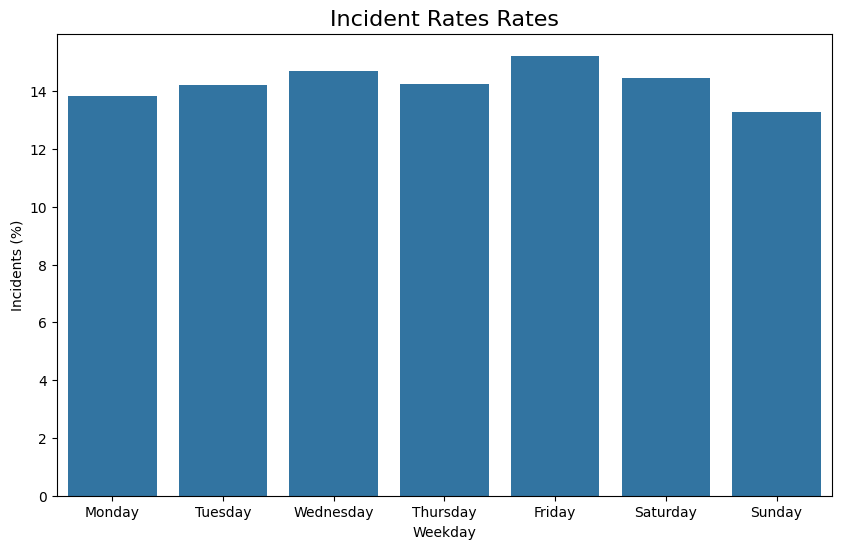

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

fig,ax=plt.subplots(figsize=(10,6))

ax=sns.barplot(
    x=temp.index,y=(temp.values/temp.values.sum())*100,orient='v'
)
ax.set_title('Incident Rates Rates',fontdict={'fontsize':16})
ax.set_xlabel('Weekday')
ax.set_ylabel('Incidents (%)')

plt.show()

In [25]:
#비율로 확인
print("DayOfWeek Incident for each category in percentage\n")
for idx,data in enumerate(train_df.groupby(["Category"])['DayOfWeek']):

  print("The Current index is:",data[0])
  print(round(data[1].value_counts()/data[1].count()*100,1))
  print()
  if idx==1:
    break

DayOfWeek Incident for each category in percentage

The Current index is: ('ARSON',)
DayOfWeek
Tuesday      15.5
Monday       15.1
Friday       14.6
Saturday     14.5
Sunday       14.0
Wednesday    13.2
Thursday     13.2
Name: count, dtype: float64

The Current index is: ('ASSAULT',)
DayOfWeek
Sunday       15.7
Saturday     15.6
Friday       14.5
Monday       13.7
Wednesday    13.7
Tuesday      13.4
Thursday     13.3
Name: count, dtype: float64



In [26]:
#전체 확인
temp=train_df.groupby('PdDistrict').count().iloc[:,0]
print(temp)

PdDistrict
BAYVIEW        89098
CENTRAL        85267
INGLESIDE      78722
MISSION       119723
NORTHERN      105105
PARK           49161
RICHMOND       45080
SOUTHERN      156528
TARAVAL        65400
TENDERLOIN     81642
Name: Dates, dtype: int64


SOUTHERN, NORTHERN, MISSION 지역의 범죄 발생건수가 높음을 알 수 있음

PARK, RICHMOND 지역은 상대적으로 낮음

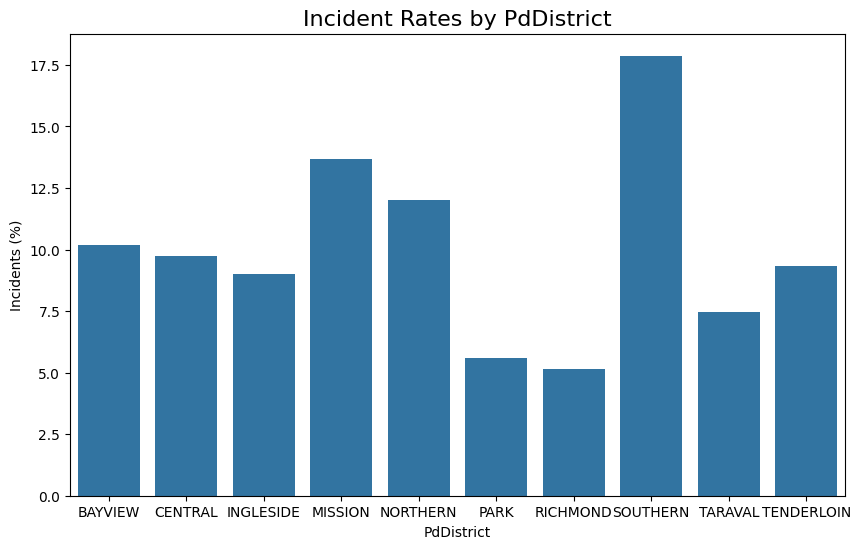

In [27]:
fig,ax=plt.subplots(figsize=(10,6))

ax=sns.barplot(
    x=temp.index, y=(temp.values/temp.values.sum())*100, orient='v'
)
ax.set_title('Incident Rates by PdDistrict',fontdict={'fontsize':16})
ax.set_xlabel('PdDistrict')
ax.set_ylabel('Incidents (%)')
plt.show()

In [28]:
print("DayOfWeek Incident for each category i percentage\n")
for idx, data in enumerate(train_df.groupby(["Category"])["PdDistrict"]):

  print("The Current index is:",data[0])
  print(round(data[1].value_counts()/data[1].count()*100,1))
  print()

  if idx==1:
    break

DayOfWeek Incident for each category i percentage

The Current index is: ('ARSON',)
PdDistrict
BAYVIEW       26.0
SOUTHERN      12.2
INGLESIDE     12.0
NORTHERN       9.9
MISSION        9.5
TARAVAL        7.9
CENTRAL        7.3
RICHMOND       6.8
PARK           4.3
TENDERLOIN     4.0
Name: count, dtype: float64

The Current index is: ('ASSAULT',)
PdDistrict
SOUTHERN      15.8
MISSION       14.5
BAYVIEW       12.8
INGLESIDE     11.1
NORTHERN      10.8
TENDERLOIN    10.0
CENTRAL        9.1
TARAVAL        7.1
PARK           4.6
RICHMOND       4.2
Name: count, dtype: float64



범죄 유형마다 지역에서 차지하는 발생 비율도 다른 것을 확인할 수 있음

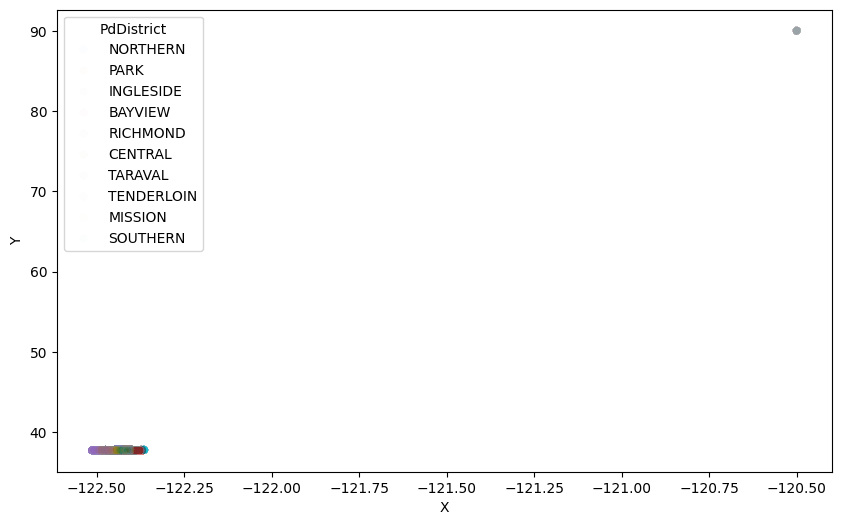

In [29]:
#위도 경도 시각화
fig, ax= plt.subplots(figsize=(10,6))
sns.scatterplot(x="X",y="Y",data=train_df,alpha=0.01,hue="PdDistrict",ax=ax)
plt.show()

극단적인 값이 있는 것을 확인할 수 있음

범례에 색깔이 안뜨는 문제(버전 문제인 것 같음)
- 최신 버전으로 업그레이드 해도 안뜸

In [30]:
print("Y>=90:",train_df.loc[train.Y>=90].count()[0])
print("Y<90:",train_df.loc[train.Y<90].count()[0])

<ipython-input-30-273f4023de65>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Y>=90:",train_df.loc[train.Y>=90].count()[0])


Y>=90: 67
Y<90: 875659


<ipython-input-30-273f4023de65>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Y<90:",train_df.loc[train.Y<90].count()[0])


기존 데이터가 많아 삭제해도 학습에 영향을 주지는 않음
- 피처 엔지니어링을 고려할 때 참고

In [31]:
print(train_df.shape)
train_df=train_df[train_df["Y"]<90]
print(train_df.shape)

(875726, 7)
(875659, 7)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


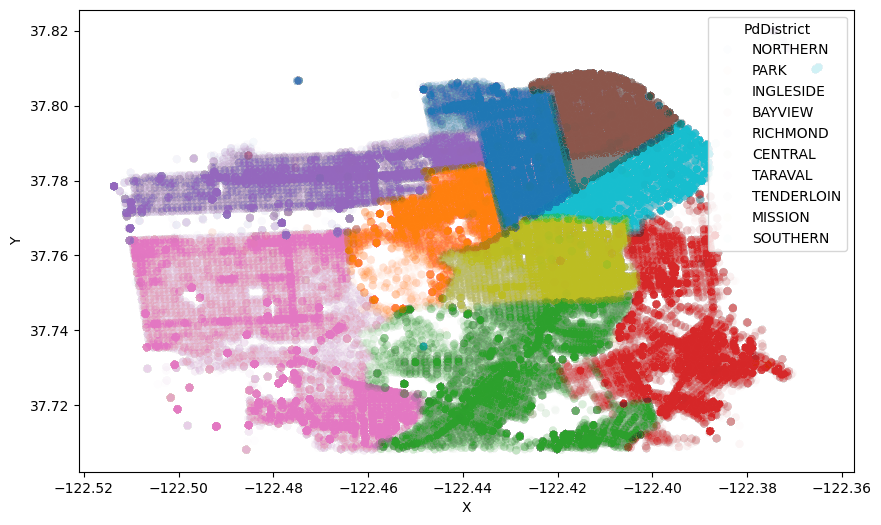

In [32]:
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x="X",y="Y",data=train_df,alpha=0.01,hue="PdDistrict",ax=ax)
plt.show()

지역별로 그룹화 되었음

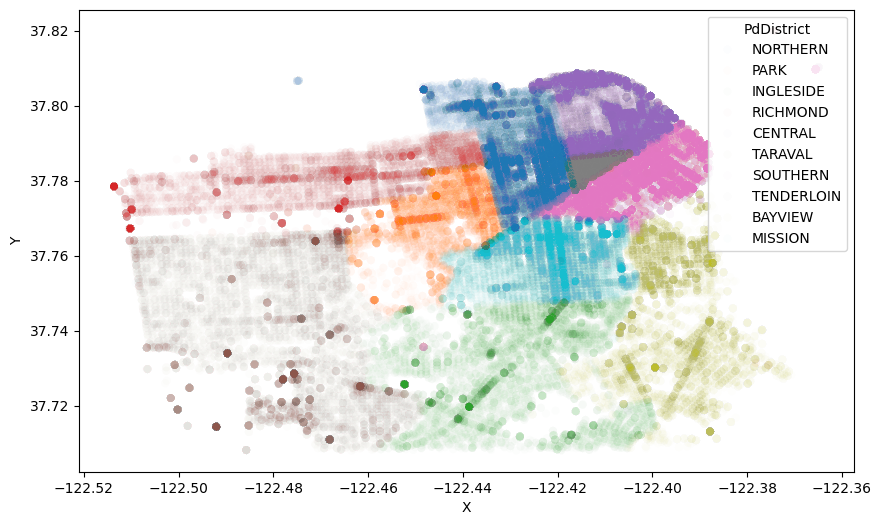

In [33]:
theft_df=train_df[train_df['Category']=='LARCENY/THEFT']
theft_df.shape

fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x="X",y="Y",data=theft_df,alpha=0.01,hue="PdDistrict",ax=ax)
plt.show()

NORTHERN, SOUTHERN, CENTRAL 관할 지역에서 절도 범죄가 가장 많이 일어남

상대적으로 RICHMON, TARAVAL 지역에서 덜 일어남

In [34]:
train_df['Dates'].dtypes

dtype('O')

O는 Object를 의미하며, 문자열로 저장된 것을 확인 할 수 있음

문자열 데이터를 날짜 데이터로 변환

In [35]:
train_df['Dates']=pd.to_datetime(train_df['Dates'])
train_df['Dates'].sample(1)

,Dates
712408,2005-04-08 17:15:00


In [36]:
train_df['Date']=train_df.Dates.dt.date
train_df['Hour']=train_df.Dates.dt.hour
daily_df=train_df.groupby('Date').count().iloc[:,0]
daily_df

,Dates
Date,
2003-01-06,400
2003-01-07,417
2003-01-08,523
2003-01-09,416
2003-01-10,397
...,...
2015-05-02,376
2015-05-03,375
2015-05-11,425


2003-01-06 부터 2015-05-13 까지의 데이터를 확인할 수 있음

<ipython-input-37-f73b4bc15077>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=daily_df,shade=True,ax=ax[1])


Text(0, 0.5, 'Density')

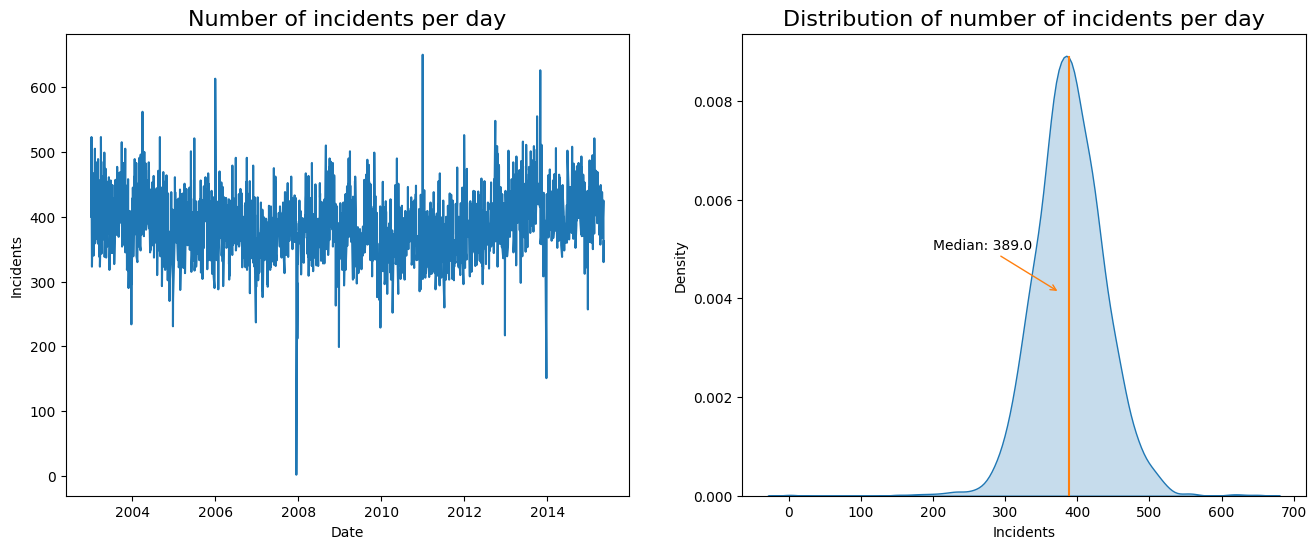

In [37]:
col=sns.color_palette()

fig,ax=plt.subplots(ncols=2,figsize=(16,6))
sns.lineplot(x=daily_df.index,y=daily_df.values,ax=ax[0])
ax[0].set_title(
    'Number of incidents per day',fontdict={'fontsize':16}
)
ax[0].set_ylabel('Incidents')

sns.kdeplot(data=daily_df,shade=True,ax=ax[1])
ax[1].axvline(x=daily_df.median(),ymax=0.95,linestyle='-',color=col[1])
ax[1].annotate(
    'Median: '+str(daily_df.median()),
    xy=(daily_df.median(),0.004),
    xytext=(200,0.005),
    arrowprops=dict(arrowstyle='->',color=col[1],shrinkB=10))
ax[1].set_title(
    'Distribution of number of incidents per day',fontdict={'fontsize':16}
)
ax[1].set_xlabel('Incidents')
ax[1].set_ylabel('Density')

일자별 데이터의 이상치가 존재

In [38]:
print("The minimum Incident day:\n",daily_df[daily_df.values==min(daily_df.values)])
print("The maximum Incident day:\n",daily_df[daily_df.values==max(daily_df.values)])

The minimum Incident day:
 Date
2007-12-16    2
Name: Dates, dtype: int64
The maximum Incident day:
 Date
2011-01-01    650
Name: Dates, dtype: int64


실제로 2건만 일어난것인지 잘못기록된 것인지 확인할 방법이 없음
- 실무에서 이러한 내용을 추가로 파악하는 것이 데이터 분석가의 부가적인 업무

The minimum Incident hour:
 Hour
5    8609
Name: Dates, dtype: int64
The maximum Incident hour:
 Hour
18    54969
Name: Dates, dtype: int64


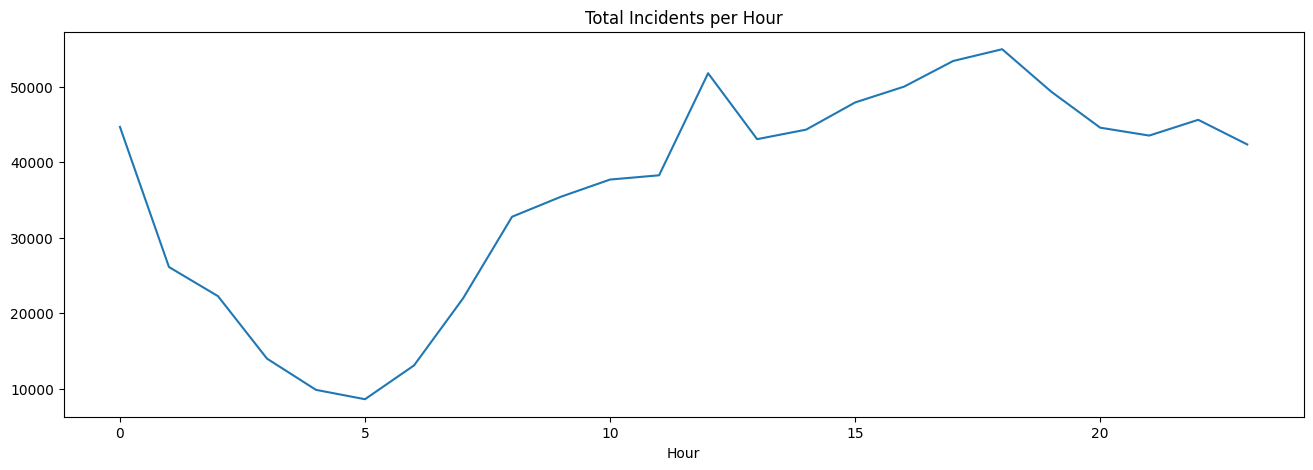

In [39]:
hour_df=train_df.groupby('Hour').count().iloc[:,0]
print("The minimum Incident hour:\n",hour_df[hour_df.values==min(hour_df.values)])
print("The maximum Incident hour:\n",hour_df[hour_df.values==max(hour_df.values)])

fig,ax=plt.subplots(figsize=(16,5))
ax=sns.lineplot(x=hour_df.index,y=hour_df.values)
plt.title('Total Incidents per Hour')
plt.show()

하루 시간대별 범죄 발생을 확인해보니 오전 5시가 가장 적은 8609를 기록

18시가 가장 많은 54969를 기록

## 피처 엔지니어링

In [40]:
def feature_engineering(data):

  #common
  data.drop_duplicates(inplace=False)
  data['Dates']=pd.to_datetime(data['Dates'])
  data['Date']=pd.to_datetime(data['Dates'].dt.date)
  data['DayOfWeek']=data['Dates'].dt.weekday
  data['Month']=data['Dates'].dt.month
  data['Year']=data['Dates'].dt.year
  data['Hour']=data['Dates'].dt.hour
  data.drop(columns=['Dates','Date','Address'],inplace=True)

  if "Id" in data.columns:
    #Test data
    data.drop(["Id"],axis=1,inplace=True)
  else:
    #Train data
    data.drop(['Descript','Resolution'],axis=1,inplace=True)
  return data

In [41]:
train=feature_engineering(train)
test=feature_engineering(test)
train.shape,test.shape

((878049, 8), (884262, 7))

Tree-Model 기반의 모형으로 진행해 별도의 Scaling은 진행하지 않음

In [42]:
#종속 변수 PdDistrict에 Label Encodeing을 적용
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le1=LabelEncoder()
train['PdDistrict']=le1.fit_transform(train['PdDistrict'])
test['PdDistrict']=le1.fit_transform(test['PdDistrict'])

le2=LabelEncoder()
X=train.drop(columns=['Category'])
y=le2.fit_transform(train['Category'])

## Modelling

### 기본 모델 구축

In [43]:
import lightgbm as lgb

train_set=lgb.Dataset(
    X,label=y,categorical_feature=['PdDistrict'],free_raw_data=False)

params={'objective':'multiclass',
        'num_class':39}

lgbm_b0=lgb.train(params,train_set,num_boost_round=6)
preds=lgbm_b0.predict(test)
preds

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 878049, number of used features: 7
[LightGBM] [Info] Start training from score -6.363608
[LightGBM] [Info] Start training from score -2.435509
[LightGBM] [Info] Start training from score -7.679105
[LightGBM] [Info] Start training from score -8.019031
[LightGBM] [Info] Start training from score -3.173428
[LightGBM] [Info] Start training from score -5.314447
[LightGBM] [Info] Start training from score -5.958804
[LightGBM] [Info] Start training from score -2.789256
[LightGBM] [Info] Start training from score -5.323749
[LightGBM] [Info] Start training from score -6.624123
[LightGBM] [Info] Start training from score -8.140280
[LightGBM] [Info] Start training from score -7.489014


array([[0.00209503, 0.10548365, 0.00033782, ..., 0.07802928, 0.04303507,
        0.01250696],
       [0.0019306 , 0.09720478, 0.00031131, ..., 0.06413405, 0.05611415,
        0.01477216],
       [0.00133904, 0.06779468, 0.00032237, ..., 0.06095709, 0.03800451,
        0.00731195],
       ...,
       [0.00220005, 0.09027931, 0.00095051, ..., 0.11407832, 0.04350985,
        0.01094295],
       [0.00342036, 0.09452388, 0.0009063 , ..., 0.08955481, 0.04763766,
        0.01134793],
       [0.00218198, 0.08203231, 0.00094271, ..., 0.11314157, 0.03386608,
        0.00836793]])

In [44]:
submission=pd.DataFrame(preds,
                        columns=le2.classes_,
                        index=test.index)
submission.to_csv('LGBM_base_model.csv',index_label='Id')

In [45]:
!kaggle competitions submit -c sf-crime -f LGBM_base_model.csv -m "Message"

100% 702M/702M [00:11<00:00, 64.8MB/s]
Successfully submitted to San Francisco Crime Classification

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((702439, 7), (175610, 7), (702439,), (175610,))

In [50]:
import xgboost as xgb
import timeit
start_time = timeit.default_timer()

params = {'max_depth': 6,
          'min_child_weight': 1,
          'num_leaves': 300,
          'objective': "multi:softprob",
          'num_class': 39,
          'eval_metric':'mlogloss',
          'tree_method': 'gpu_hist',
          'n_jobs':-1}

xgbtrain, xgbval = xgb.DMatrix(X_train, y_train), xgb.DMatrix(X_val, y_val),
xgb_final_model = xgb.train(params,
                            xgbtrain,
                            100,
                            evals=[(xgbtrain, 'train'), (xgbval, 'eval')],
                            early_stopping_rounds=10,
                            verbose_eval = 2)

terminate_time = timeit.default_timer()
print("%f초 걸렸습니다." % (terminate_time - start_time))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:54:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:54:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-mlogloss:3.12487	eval-mlogloss:3.12568
[2]	train-mlogloss:2.82017	eval-mlogloss:2.82410
[4]	train-mlogloss:2.67351	eval-mlogloss:2.68006
[6]	train-mlogloss:2.58674	eval-mlogloss:2.59587
[8]	train-mlogloss:2.52909	eval-mlogloss:2.54073
[10]	train-mlogloss:2.49072	eval-mlogloss:2.50488
[12]	train-mlogloss:2.46307	eval-mlogloss:2.47968
[14]	train-mlogloss:2.44253	eval-mlogloss:2.46153
[16]	train-mlogloss:2.42691	eval-mlogloss:2.44850
[18]	train-mlogloss:2.41510	eval-mlogloss:2.43928
[20]	train-mlogloss:2.40501	eval-mlogloss:2.43186
[22]	train-mlogloss:2.39594	eval-mlogloss:2.42546
[24]	train-mlogloss:2.38847	eval-mlogloss:2.42055
[26]	train-mlogloss:2.38146	eval-mlogloss:2.41613
[28]	train-mlogloss:2.37569	eval-mlogloss:2.41301
[30]	train-mlogloss:2.37009	eval-mlogloss:2.41007
[32]	train-mlogloss:2.36482	eval-mlogloss:2.40740
[34]	train-mlogloss:2.36029	eval-mlogloss:2.40536
[36]	train-mlogloss:2.35578	eval-mlogloss:2.40319
[38]	train-mlogloss:2.35168	eval-mlogloss:2.40144
[40]	

In [52]:
test_xgb  = xgb.DMatrix(test)
preds = xgb_final_model.predict(test_xgb)
submission = pd.DataFrame(preds,
                          columns=le2.classes_,
                          index=test.index)
submission.to_csv('XGBoost_final_model.csv', index_label='Id')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:56:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [53]:
!kaggle competitions submit -c sf-crime -f XGBoost_final_model.csv -m "Message"

100% 419M/419M [00:07<00:00, 62.5MB/s]
Successfully submitted to San Francisco Crime Classification